<a href="https://colab.research.google.com/github/Oscar19922017/SeriesTiempo/blob/main/SerieFinancieraSARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import plotly.express as px
import pandas_datareader as wb

In [3]:
today =  datetime.today().strftime("%Y-%m-%d")
today

'2022-06-13'

In [4]:
inicio="2017-01-01"
ticker="AAPL"#"^IXIC"
df= wb.DataReader(ticker,"yahoo",inicio,today)

In [5]:
ticker1="^IXIC"
df1= wb.DataReader(ticker1,"yahoo",inicio,today)

In [6]:
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.257643
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.227137


In [7]:
df1.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,5452.569824,5397.990234,5425.620117,5429.080078,1886200000,5429.080078
2017-01-04,5482.350098,5440.240234,5440.910156,5477.000000,1883360000,5477.000000


In [8]:
APPLE=pd.DataFrame(df["Close"])
APPLE.columns=["Apple"]

In [9]:
NASDA=pd.DataFrame(df1["Close"])
NASDA.columns=["Nasda"]

In [10]:
df=pd.concat([APPLE,NASDA],axis=1)

In [11]:
df.head()

,Apple,Nasda
Date,,
2017-01-03,29.037500,5429.080078
2017-01-04,29.004999,5477.000000
2017-01-05,29.152500,5487.939941
2017-01-06,29.477501,5521.060059
2017-01-09,29.747499,5531.819824


In [12]:
df.tail()

,Apple,Nasda
Date,,
2022-06-07,148.710007,12175.230469
2022-06-08,147.960007,12086.269531
2022-06-09,142.639999,11754.230469
2022-06-10,137.130005,11340.019531
2022-06-13,131.880005,10809.225586


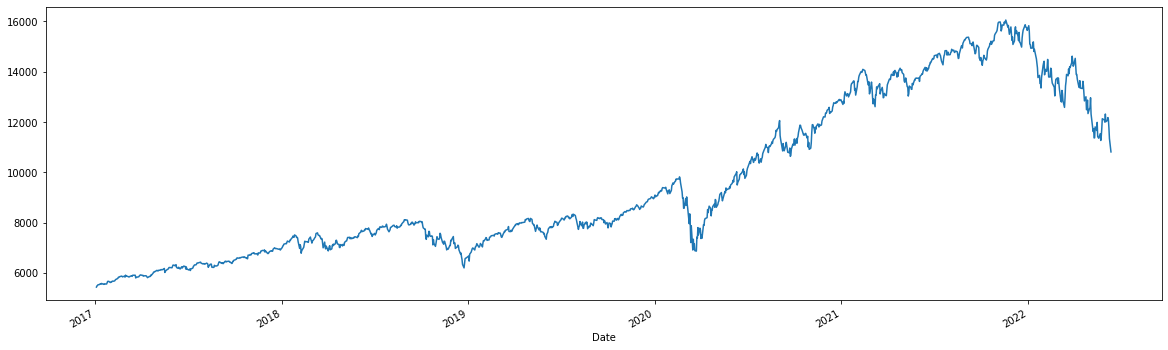

In [13]:
df["Nasda"].plot(figsize=(20,6))

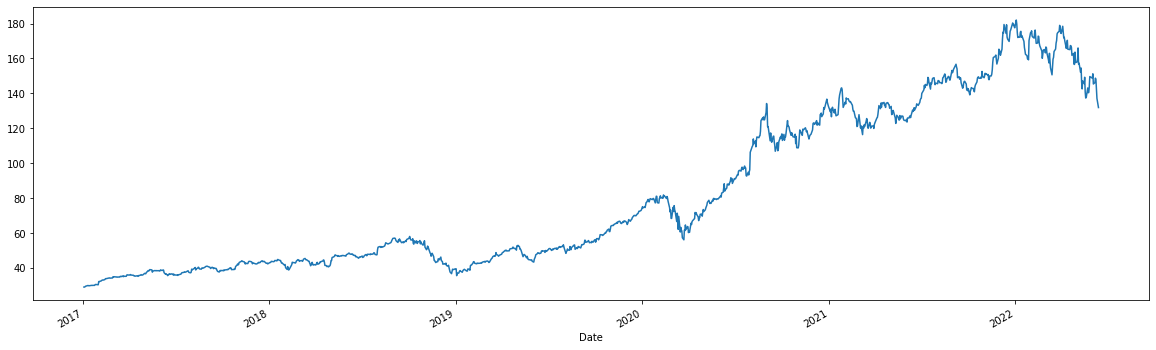

In [14]:
df["Apple"].plot(figsize=(20,6))

In [15]:
df1=df.resample("M").mean()

In [16]:
df1.shape

(66, 2)

**Train**

In [17]:
train=df1["2017-01-31":"2021-06-30"]
train

,Apple,Nasda
Date,,
2017-01-31,29.892500,5561.423486
2017-02-28,33.428552,5764.702097
2017-03-31,35.154457,5864.964334
2017-04-30,35.721710,5912.169485
2017-05-31,38.056932,6124.878174
2017-06-30,36.957840,6224.285889
2017-07-31,37.074875,6294.674023
2017-08-31,39.755326,6311.397397
2017-09-30,39.402125,6428.078979


In [18]:
test=df1["2021-07-31":]
test

,Apple,Nasda
Date,,
2021-07-31,145.139524,14639.072870
2021-08-31,148.177727,14856.517711
2021-09-30,148.306190,15023.538551
2021-10-31,145.563809,14879.012323
2021-11-30,154.255716,15814.932896
2021-12-31,173.552727,15474.431729
2022-01-31,169.861500,14531.377490
2022-02-28,169.830001,13898.728413
2022-03-31,165.310435,13623.262950


**Identificar quien es X Exogena**

In [19]:
y_train=train["Apple"]
X_train=train["Nasda"]

In [20]:
import itertools
import statsmodels.api as sm 
from pylab import rcParams

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

p1=[]
p2=[]
p3=[]


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train, exog=X_train,order=param,seasonal_order=param_seasonal,enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            #print("ARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            p1.append(param)
            p2.append( param_seasonal)
            p3.append(results.aic)
            
        except:
            continue
df = pd.DataFrame({'param' : p1, 'param_seasonal' :p2,"results.aic":p3})
df[df["results.aic"]==min(p3)]

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

,param,param_seasonal,results.aic
54,"(1, 1, 0)","(1, 1, 0, 12)",163.337683


In [25]:
mod = sm.tsa.statespace.SARIMAX(y_train,exog=X_train,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Nasda          0.0104      0.001      8.571      0.000       0.008       0.013
ar.L1          0.1254      0.235      0.534      0.593      -0.335       0.586
ar.S.L12      -0.6980      0.339     -2.059      0.039      -1.362      -0.034
sigma2        15.0306      4.374      3.436      0.001       6.457      23.604


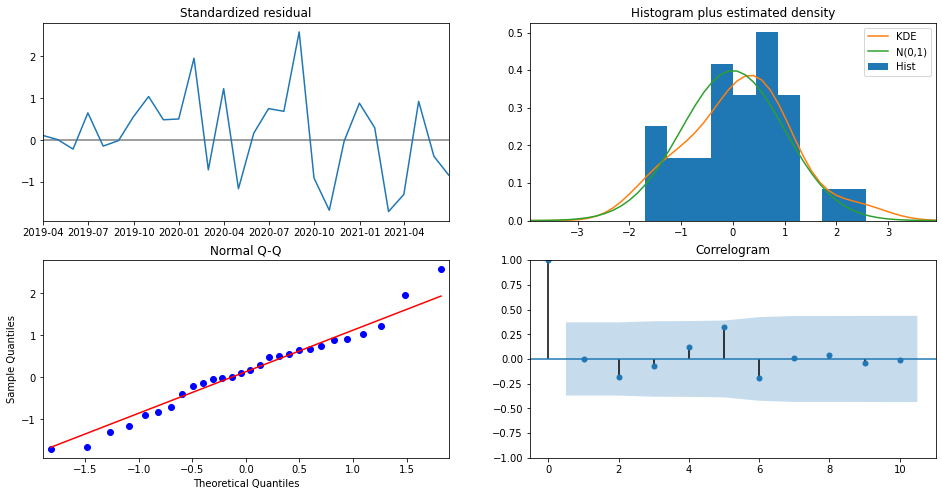

In [26]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [32]:
pred=results.get_prediction(start=pd.to_datetime("2017-01-31"),dynamic=False)

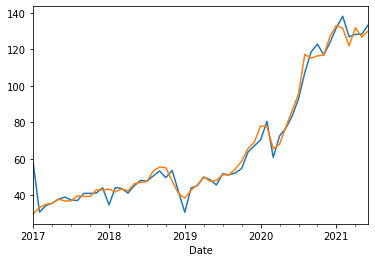

In [33]:
pred.predicted_mean.plot()
y_train.plot()

**Error Train**

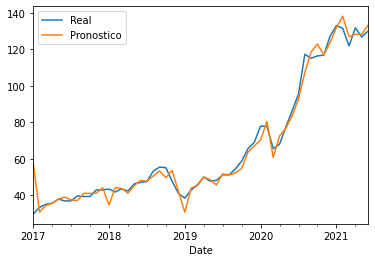

In [36]:
Resultado_train=pd.concat([pd.DataFrame(y_train),pd.DataFrame(pred.predicted_mean)],axis=1)
Resultado_train.columns=["Real","Pronostico"]
Resultado_train.plot()
plt.show()

In [37]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

from sklearn.metrics import mean_absolute_error as MAE

def rmse (actual, pred):
    actual, pred = np.array (actual), np.array (pred)
    return np.sqrt (np.square (np.subtract (actual, pred)). mean ())

In [38]:
Actual=Resultado_train.Real
Prediccion=Resultado_train.Pronostico
MapeTrain=MAPE(Actual,Prediccion)
print(MapeTrain)
RMSETrain=rmse(Actual,Prediccion)
print(RMSETrain)
MaeTrain=MAE(Actual,Prediccion)
print(MaeTrain)

5.904623724294111
5.183583290859014
3.122109638943316


**Pronostico Para el Ultimo Año**

In [52]:
X_Test=test["Nasda"]
y_test=test["Apple"]

In [53]:
X_Test.values.reshape(-1,1)

array([[14639.07287016],
       [14856.51771129],
       [15023.53855097],
       [14879.01232329],
       [15814.93289621],
       [15474.4317294 ],
       [14531.37749023],
       [13898.72841283],
       [13623.26295007],
       [13394.16303711],
       [11829.72953869],
       [11838.93739149]])

In [54]:
Pred_uc=results.get_forecast(steps=12,exog=X_Test.values.reshape(-1,1))

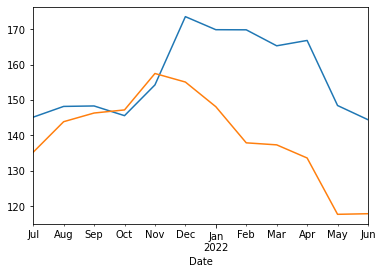

In [55]:
y_test.plot(label="Observado")
Pred_uc.predicted_mean.plot()

In [56]:
Resultado_test=pd.concat([pd.DataFrame(y_test),pd.DataFrame(Pred_uc.predicted_mean)],axis=1)
Resultado_test.columns=["Real","Pronostico"]

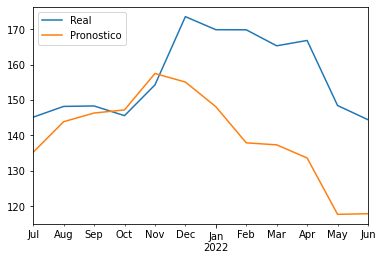

In [57]:
Resultado_test.plot()
plt.show()

In [58]:
Actual=Resultado_test.Real
Prediccion=Resultado_test.Pronostico
MapeTest=MAPE(Actual,Prediccion)
print("MAPE: ",MapeTest)
RMSETest=rmse(Actual,Prediccion)
print("RMSE" ,RMSETest)
MaeTest=MAE(Actual,Prediccion)
print("MAE: ", MaeTest)

MAPE:  11.045503547988266
RMSE 21.427491871831247
MAE:  17.652126135304112
